# Homework #4
Noam Yan

## Problem 0

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

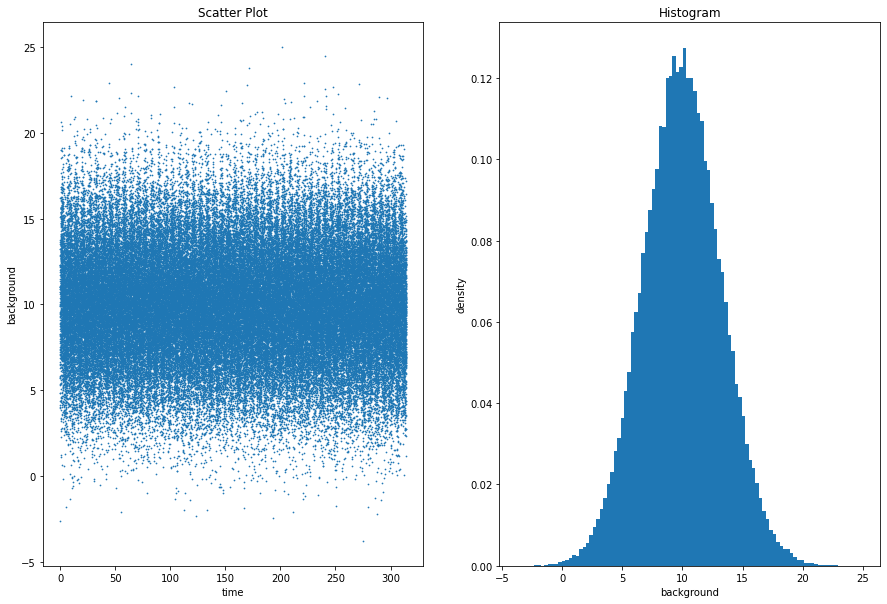

In [2]:
t = np.linspace(0,np.pi*100,np.int(1e5))
N = 10+np.sin(t)
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

plt.rcParams["figure.figsize"] = (15,10)
fig,ax = plt.subplots(1,2)
ax[0].scatter(t,bkgd,s=.5)
ax[0].set_title("Scatter Plot")
ax[0].set_xlabel("time")
ax[0].set_ylabel("background")
ax[1].hist(bkgd,100,density=True)
ax[1].set_title("Histogram")
ax[1].set_xlabel("background")
ax[1].set_ylabel("density")
plt.show()

## Problem 1
1a)

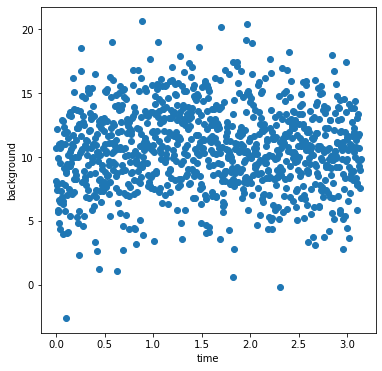

In [3]:
plt.rcParams["figure.figsize"] = (6,6)
data = bkgd[:1000]
xrange = t[:1000]
plt.scatter(xrange,data)
plt.xlabel("time")
plt.ylabel("background")
plt.show()

1b)

In [4]:
def slice_plot(xrange,data,start,size):
    data = data[start:(start+size)]
    xrange = xrange[start:(start+size)]
    plt.scatter(xrange,data,s=1)
    plt.xlabel("time")
    plt.ylabel("background")
    plt.show()

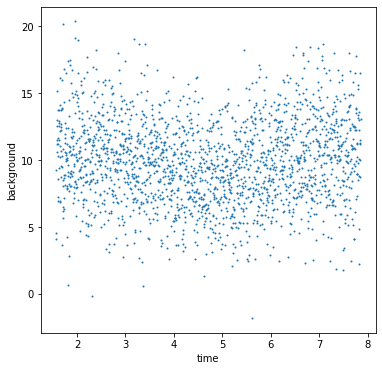

In [5]:
slice_plot(t,bkgd,500,2000)

1c)

In [6]:
def sample_plot(xrange,data,period):
    data=data[np.arange(0,data.shape[0],period)]
    xrange = xrange[np.arange(0,xrange.shape[0],period)]
    plt.scatter(xrange,data,s=1)
    plt.xlabel("time")
    plt.ylabel("background")
    plt.show()

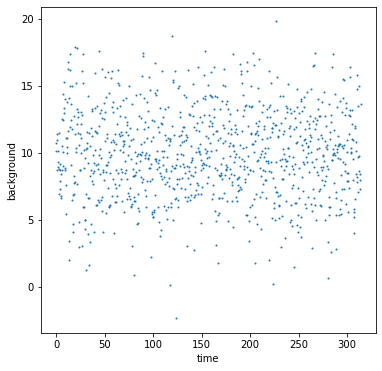

In [7]:
sample_plot(t,bkgd,100)

# Problem 2
2a)

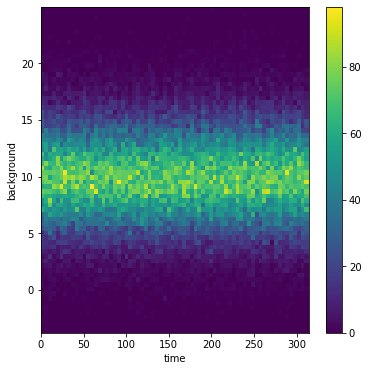

In [8]:
plt.hist2d(t,bkgd,70)
plt.xlabel("time")
plt.ylabel("background")
plt.colorbar()
plt.show()

2b) The plot shows the distribution of points. According to the color bar, the brighter the color is, the denser points are distributed. In this case, points are mainly distributed around 10 with respect to background, and almost evenly ditributed with respect to time.

# Problem 3
3a)

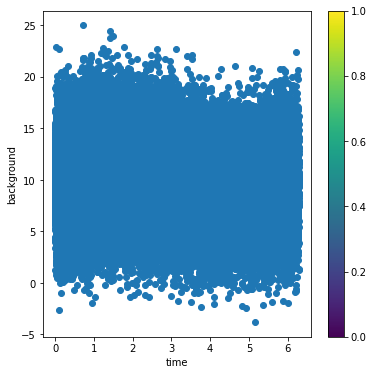

In [9]:
t_mod = np.mod(t,(np.pi*2))
plt.scatter(t_mod,bkgd)
plt.xlabel("time")
plt.ylabel("background")
plt.colorbar()
plt.show()

From the boundary shape, it looks like a sinusoid, but we need histogram2D to verify it.<br>
3b)

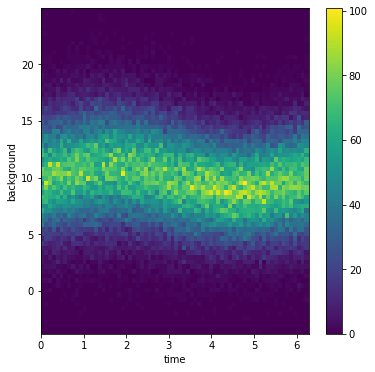

In [10]:
plt.hist2d(t_mod,bkgd,70)
plt.xlabel("time")
plt.ylabel("background")
plt.colorbar()
plt.show()

Now, it is clear that the shape is sinusoid.

In [11]:
bins=70
x_bin = np.linspace(0,2*np.pi,bins)
x_dig = np.digitize(t_mod,x_bin)

In [12]:
means = []
for i in range(70):
    means.append(np.mean(bkgd[x_dig==i]))

D:\Anaconda\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


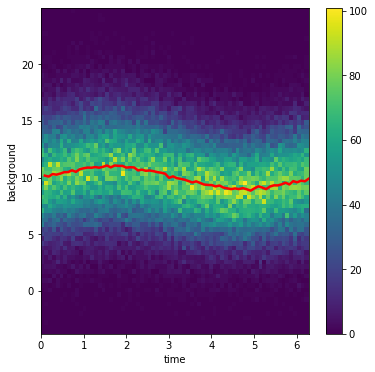

In [13]:
plt.hist2d(t_mod,bkgd,70)
plt.plot(x_bin,means,color='r',linewidth=2.5)
plt.xlabel("time")
plt.ylabel("background")
plt.colorbar()
plt.show()